<a href="https://colab.research.google.com/github/compi1234/spchlab/blob/main/lab01_speech_audio/AuditoryDemonstrations.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Google Colab" title="Open in Google Colab"></a> 
# Auditory Demonstrations 
____   
These demos are Jupyter notebook wrappers around selected demos from the AUDITORY DEMONSTRATIONS CD
made in 1987 at the Institute for Perception Research (IPO)
Eindhoven, The Netherlands, with
support by the Acoustical Society of America.

**Reference**:  [**Auditory Demonstrations**](https://research.tue.nl/en/publications/auditory-demonstrations), *A.J.M. Houtsma, Th.D. Rossing, W.M. Wagemakers*, Technische Universiteit Eindhoven, Institute for Perception Research, 1987.    More detailed documentation may be found  [here].(https://pure.tue.nl/ws/portalfiles/portal/79033010/402660.pdf)

The **Jupyter notebook** embedding allows for additional functionality such as zooming into details, viewing waveforms, spectrograms and feature functions in a simple framework.  You are encouraged to develop and test your personal feature function and test them in view of the presented demonstrations. 



*Dirk Van Compernolle*   
*June 2021*


## Getting Started
**You first need to run the next four cells in order.**  They contain:
- necessary imports  (install pyspch if needed)
- definitions of the demos
- special functionality for this demo
- definition of the AuditoryDemo GUI

Afterwards the demos can be ran in any order.
For each demo there is an extensive introduction with background information, some more details on the demonstrations themselves and some questions that you should try to answer.

In [1]:
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        %pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# %matplotlib inline

from urllib.request import urlopen
from IPython.display import display, Audio, HTML, clear_output
from ipywidgets import interactive
import ipywidgets as widgets
import math
import numpy as np
### REQUIRED PACKAGES
# 
# You need the pyspch package to be installed to run these demos
# installing pyspch will automatically install additional packages such as soundfile, librosa
# 
try:
  import google.colab
  IN_COLAB = True 
except:
  IN_COLAB = False

try:
  import pyspch
except:
  %pip install git+https://github.com/compi1234/pyspch.git
    
import pyspch.sp as Sps
import pyspch.core as Sp
import pyspch.display as Spd

In [3]:
root='https://homes.esat.kuleuven.be/~compi/demos/AuditoryDemonstrations/'
demos={}
demos['Demo2'] = {
    'title':'Critical Bands by Masking',
    'parts':[
        {'section':'Demo2a','file':'TrackNo02.wav','instr':[0,14.],'times':[15.,29.],'txt': "A 2000Hz in 10 decreasing steps of 5 decibels"},
        {'section':'Demo2b','file':'TrackNo03.wav','instr':[0,4.],'times':[4.,20.],'txt': "The signal is masked with broadband noise"},
        {'section':'Demo2c','file':'TrackNo04.wav','instr':[0,4.],'times':[4.,20.],'txt': "The noise bandwidth is reduced to 1000Hz"},
        {'section':'Demo2d','file':'TrackNo05.wav','instr':[0,5.],'times':[5.,20.],'txt': "The noise bandwidth is reduced to 250Hz"},
        {'section':'Demo2e','file':'TrackNo06.wav','instr':[0,5.],'times':[5.,20.],'txt': "The noise bandwidth is reduced to 10Hz"}
    ]
}

demos['Demo4'] = {
    'title':'The Decibel Scale',
    'parts':[
        {'section':'Demo4a','file':'TrackNo08.wav','instr':[0.,12.],'times':[12.,26.], 'txt':'Broadband Noise is reduced in 10 Steps of 6dB'},
        {'section':'Demo4b','file':'TrackNo09.wav','times':[6.,26.], 'txt':'Broadband Noise is reduced in 15 Steps of 3dB' },
        {'section':'Demo4c','file':'TrackNo10.wav','times':[6.,31.], 'txt':'Broadband Noise is reduced in 20 Steps of 1dB' },
        {'section':'Demo4d','file':'TrackNo11.wav','times':[6.,31.], 'txt':'Freefield Speech at various distances from the microphone' }
    ]
}

demos['Demo6'] = {
    'title':'Frequency Response of the Ear',
    'parts':[
        {'section':'125Hz','file':'TrackNo18_125.wav', 'txt':'125Hz'},
        {'section':'250Hz','file':'TrackNo18_250.wav','txt':'250Hz'},
        {'section':'500Hz','file':'TrackNo18_500.wav', 'txt':'500Hz'}, 
        {'section':'1000Hz - calibration','file':'TrackNo18_1000.wav', 'txt':'1000Hz - calibration tone'},        
        {'section':'2000Hz','file':'TrackNo18_2000.wav','txt':'2000Hz'},
        {'section':'4000Hz','file':'TrackNo18_4000.wav', 'txt':'4000Hz'},
        {'section':'8000Hz','file':'TrackNo18_8000.wav', 'txt':'8000Hz'}
    ]
}



demos['Demo28'] = {
    'title':'The Effect of Spectrum on Timbre',
    'parts':[
        {'section':'Demo28a','file':'TrackNo53.wav','instr':[0,10.],'times':[10.,43.],'txt': "Adding partials (Carillon)"},
        {'section':'Demo28b','file':'TrackNo53.wav','instr':[0,10.],'times':[44.,77.],'txt': "Adding partials (Guitar)"}
    ]
}

demos['Demo29'] = {
    'title':'Effect of Tone Envelope on Timbre',
    'parts':[
        {'section':'Demo29a','file':'TrackNo54.wav','instr':[0,10],'times':[10.,47], 'txt': "You hear a recording of a Bach chorale played on a piano"},
        {'section':'Demo29b','file':'TrackNo55.wav','instr':[0,4],'times':[4.0,41], 'txt': "The same chorale played backwards"},
        {'section':'Demo29c','file':'TrackNo56.wav','instr':[0,9],'times':[9.0,33], 'txt': "The tape of the previous recording played backwards"}
    ] }

demos['Demo35'] = {
    'title':'The Effect of Echoes',
    'parts':[
        {'section':'Demo35a','file':'TrackNo70.wav','instr':[0,23.],'times':[23.,46.],'txt': "Anechoic Room"},
        {'section':'Demo35b','file':'TrackNo70.wav','times':[50.,75.],'txt': "Conference Room"},
        {'section':'Demo35c','file':'TrackNo70.wav','times':[80.,108.],'txt': "Reverberant Space"}    ]
}

In [4]:
# Energy function in dB
# we measure intensity as  10. * log10(SUM(x^2)/N) + 14
# - the +15 offset is arbitrary
# - the EPS of 1.e-10 yields a range of around 60dB
# 
EPS = 1.e-10
OFFSET = 15.0
def en_db(y,sample_rate=16000,f_shift=0.01):
    n_shift = int(f_shift*sample_rate)
    nfr = int(len(y)/n_shift)
    energy = np.zeros((nfr,))
    for ifr in range(0,nfr):
        energy[ifr] = np.sum(np.square(y[ifr*n_shift:(ifr*n_shift+n_shift)]))/float(n_shift)
    en = 10*np.log10(energy+EPS) + OFFSET
    return(en)
    
def load_demo(demo,sample_rate=16000):
    wavdata,sr = Sp.load(root + demo['file'],sample_rate=sample_rate,mono=True)
    if 'times' in demo.keys():
        indxx = (np.array(demo['times'])*sr).astype('int64')
        if(indxx[1]<0): indxx[1]=-1
        demo_data = wavdata[ indxx[0]:indxx[1] ]
    else:
        demo_data = wavdata
    if 'instr' in demo.keys():
        indxx = (np.array(demo['instr'])*sr).astype('int64')
        instr_data = wavdata[ indxx[0]:indxx[1] ] 
    else: 
        instr_data = None
    return(instr_data,demo_data,sr)

# A figure with sampled data, energy and Fourier spectrogram
def make_fig1(wavdata=[],en=[],spgdata=[],sr=None,**kwargs):
    (nparam,nfr)= spgdata.shape
    fig = Spd.SpchFig(row_heights=[1.,1.,4.])
    fig.add_line_plot(wavdata,iax=0,dx=1/sr)
    fig.add_line_plot(en,iax=1,dx=0.01,ylabel='Energy(dB)')
    fig.axes[1].set_ylim([-60,0])
    dy=(sr/2)/float(nparam-1)
    fig.add_img_plot(spgdata,iax=2,dx=0.01,dy=dy,xlabel='Time (sec)',ylabel='Frequency (Hz)')   
    return(fig)

# A figure with sampled data, spectrogram and spectrogram waterfall
def make_fig2(wavdata=[],spgdata=[],sr=None,n=100,scale=-.01,x0=None,**kwargs):
    fig = Spd.SpchFig(row_heights=[1.,3.,3.])
    fig.add_line_plot(wavdata,iax=0,dx=1/sr)
    fig.add_img_plot(spgdata,iax=1,dx=0.01,dy=(sr/2)/257.,xlabel='Time (sec)',ylabel='Frequency (Hz)') 
    fig.add_waterfall2D(spgdata[:,0::n],scale=scale,iax=2,dx=.01*n,x0=x0)
    fig.axes[2].set_ylim([0,256])
    return(fig)

# a default boxed layout
def box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

In [5]:
class AuditoryDemo(widgets.VBox):
    def __init__(self,plot_func=make_fig1,demo=None,init=0,sample_rate=16000,**kwargs):
        super().__init__()
            
        if demo is None: self.name = 'Demo4'
        else: self.name = demo
        self.demo = demos[self.name]
        self.options = [ p['section'] for p in self.demo['parts']] 
        self.section = self.demo['parts'][init]
        self.wavdata = None
        self.wavtimes = [0.,1.]
        self.root = 'https://homes.esat.kuleuven.be/~compi/demos/AuditoryDemonstrations/'
        self.fig = None
        self.dpi = 72
        self.plot_func = plot_func
        self.kwargs = kwargs
        self.sr = sample_rate
        
        # create the widgets
        self.wg_title = widgets.Output(layout=widgets.Layout(height='60px',width='66%'))

        self.wg_section = widgets.Dropdown(options=self.options,value=self.options[init],description="",layout=widgets.Layout(height='60px',width='33%'))
        self.wg_section.observe(self.update_section,'value')
        self.wg_txt1 = widgets.Text(value='Zoom in to Selection')
        self.wg_range = widgets.FloatRangeSlider(min=self.wavtimes[0],max=self.wavtimes[1],value=self.wavtimes,step=.02,
                                                 readout_format='.2f',continuous_update=False,readout=True,description='')
        self.wg_range.observe(self.update_range,'value')
        
        self.output = widgets.Output()
        self.text_commentary = widgets.Output() 
        self.audio_instructions = widgets.Output()
        self.audio_demo = widgets.Output()
        
        self.top = widgets.HBox([self.wg_title, self.wg_section],layout=box_layout())
        self.left = widgets.VBox([self.output],layout=box_layout())
        self.left.layout.width = '66%'
        self.right = widgets.VBox([self.audio_instructions, self.audio_demo, self.wg_txt1,self.wg_range], layout=box_layout())
        self.right.layout.width = '33%'
        self.children = [ self.top , widgets.HBox([self.left, self.right])]
        self.init_section()
    
    def update_section(self,change):
        self.section = self.demo['parts'][self.options.index(change.new)]
        self.init_section()
        
    def init_section(self):
        with self.wg_title:
            clear_output()
            print("\nloading new demo , hang on   ...")
        
        self.instr_data, self.wavdata, self.sr = load_demo(self.section,self.sr)
        self.spgdata = Sps.spectrogram(self.wavdata,sample_rate=self.sr)
        self.en = en_db(self.wavdata,self.sr)
        self.wav_times = np.array([0.,len(self.wavdata)/self.sr])
        self.sel_times = self.wav_times
        self.wg_range.min = self.wav_times[0]
        self.wg_range.max = self.wav_times[1]
        self.wg_range.value = tuple(self.wav_times)
        self.update_fig()       
        
    def update_range(self,change):
        self.sel_times = np.array(change.new)

        self.update_fig()
        
    def update_fig(self):
        indxf = (self.sel_times/0.01).astype(int)
        indxt = (self.sel_times*self.sr).astype(int)
        demo_data = self.wavdata[indxt[0]:indxt[1]]
        demo_spg = self.spgdata[:,indxf[0]:indxf[1]]
        demo_en = self.en[indxf[0]:indxf[1]]
        self.fig = self.plot_func(wavdata=demo_data,spgdata=demo_spg,en=demo_en,sr=self.sr,**self.kwargs)
        
        with self.wg_title:
            clear_output()
            print(self.name + ": " + self.demo['title'] + "\n")
            print(self.section['txt']) 
            
        with self.audio_instructions:
            clear_output()
            if self.instr_data is not None:
                print("Listen to the instructions")
                display(Audio(data=self.instr_data,rate=self.sr,autoplay=False))
                
        with self.audio_demo:
            clear_output(wait=True)
            print("\nListen to the demo")
            display(Audio(data=demo_data,rate=self.sr,autoplay=False))        
            print("\n")
            
        with self.output:
            clear_output(wait=True)
            display(self.fig)


## The Decibel Scale (Demo 4, Tracks 08-11) 

#### Background: Sound Pressure, Power and Loundness

In a sound wave there are extremely small periodic variations in atmospheric pressure to which our ears respond in a rather complex manner. The minimum pressure
fluctuation to which the ear can respond is less than one billionth ($10^{-9}$ ) of atmospheric
pressure. (This is even more remarkable when we consider that storm fronts can cause
the atmospheric pressure to change by as much as 5 to 10% in a few minutes.) The
threshold of audibility, which varies from person to person, typically corresponds to
a sound pressure amplitude of about $2x10^{-5} N/m2$ at a frequency of 1000 Hz. The
threshold of pain corresponds to a pressure amplitude approximately one million ($10^6$)
times greater, but still less than 1/1000 of atmospheric pressure (which is about ${10}^{6} \mu bars$).
Because of the wide range of pressure stimuli, it is convenient to measure sound
pressures on a logarithmic scale, called the decibel (dB) scale. Thus we define sound pressure level as:   
$$
L_p = 20 log p/p_0
\hspace{1cm} \text{ with }  p_0  = 2 x 10^{-5}N/m^2 =20 \mu Pa 
$$

Another quantity described by a decibel level is sound intensity, which is the rate
of energy flow across a unit area. 
Sound intensity level is defined as: 

$$
L_i = 10 logI/I_0   \hspace{1cm} \text{ with  } I_0 = {10}^{-12} W/{m^2}
$$

The relationship between sound pressure level and sound power level depends on
several factors, including the geometry of the source and the room. If the sound power
level of a source is increased by 10 dB, the sound pressure level also increases by 10
dB, provided everything else remains the same. If a source radiates sound equally in all
directions and there are no reflecting surfaces nearby (a free field), the sound pressure
level decreases by 6 dB each time the distance from the source doubles.

Loudness is a subjective quality. While loudness depends very much on the sound
pressure level, it also depends upon such things as the frequency, the spectrum, the
duration, and the amplitude envelope of the sound, plus the environmental conditions
under which it is heard and the auditory condition of the listener.

#### The Demo

In the first part of this demonstration, we hear broadband noise reduced in steps of
6, 3, and 1 dB in order to obtain a feeling for the decibel scale.
In the latter part, a voice is heard at distances of 25, 50, 100, and 200 em from an
omni-directional microphone in an anechoic room. Under these conditions, the sound
pressure level decreases about 6 dB each time the distance is doubled. (In a normal
room this will not be the case, since considerable sound energy reaches the microphone
via reflections from walls, ceiling, floor, and objects within the room.)  

The figure contains following representations:
- the time waveform
- energy on a dB scale
- spectrogram


#### Things to investigate
1. The full dynamic range of the auditory system is about 120dB. However we need much less for our day to day usage. From the above examples, what level difference can you have between a soft and loud speech signal such that they are both comfortable and understandable without excessive effort from the listener?

2. Explain the difference in acoustic behaviour between an anechoic room and the computer lab that you are in. Would you dare estimating the SPL differences when someone is talking to you from 25, 50, 100 and 200 cm in this room?

3. What is the theoretical dynamic range that can be captured using 16bit quantization as on a standard CD recording ?

### Answers

1. About 50 dB in energy.

2. For the anechoic room, the signal that reaches the receiver is only the direct signal. In a normal room, the signal that reaches the receiver is the direct signal plus the reflected signals. The SPL decreases by 6 dB each time the distance is doubled. Does this suffice as an answer?

3. CD sampling rate is 44.1 kHz. The theoretical dynamic range is $20 \log{2^{16}} = 96 dB$.

In [6]:
AuditoryDemo(demo="Demo4")

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(layout=Layou…

##  Frequency Response of the ear (Demo 6, Tracks 18) 

#### Introduction

Although sounds with a greater sound pressure level usually sound louder, this
is not always the case. The sensitivity of the ear varies with the frequency and the
quality of the sound. Many years ago Fletcher and Munson (1933) determined curves of equal loudness for pure tones (that is, tones of a single frequency). 

The contours of equal loudness are labeled in units called phons, the level in phons
being numerically equal to the sound pressure level in decibels at f = 1000 Hz.

Equal Loudness curves illustrate the frequency dependent relationship between intensity and loudness of a sound.   Sound Presure Level (expressed in dB) measures the intensity of a sound, it is a *physical* unit.  Loudness on the other hand measures how loud a human perceives a sound; it is a *psychophysical* unit.

<img src="../figures/Fletcher_Munson.jpg">

#### This Demo - The Audiometer

In this demonstration, we compare the thresholds of audibility (in a room) of tones
having frequencies of 125, 250, 500, 1000, 2000, 4000, and 8000 Hz. The tones are 100
ms in length and decrease in 10 steps of -5 dB each. 
In this demo "you" are the subject of a psychoaoustic experiment, hence the result is your personal audiogram.
 
To properly execute this demo, use the following steps with precision:

1. Calibration
- use the 1kHz tone staircase as calibration sequence (1kHz sits nicely within the most sensitive frequency range for human hearing)
- play this tone staircase and adjust the level of your loudspeaker such that the softest tone is just audible, i.e. barely audible, i.e. not audible anymore if you turn down the amplifier by about 3dB !

2. Estimating the audiogram
- play staircases at other frequencies and count the number of tones that you can hear; when you hear fewer than 10, you can easily calculate your threshold level (up to 5dB resolution)
- sketch your results on a graph showing your threshold of hearing at each of the frequencies

#### Questions

- What if the demo crashed ?
    + By default we use a sampling rate of 24kHz, so that we easily can play the highest frequencies (8kHz is max in the demo).  This sampling rate is supported on most systems these days.   If there is a crashing behavior, try 22050Hz as sampling rate (this is an optional parameter in starting 'AuditoryDemo'.  If you go lower (if needed for your hardware), you must realize that the 8kHz tones can not be rendered with a sample rate of 16000 Hz  (sample rate should always be higher than 2x any frequency that you want to play -- plus add a bit of margin onto that for the analog equipment)
- When should you consult an audiologist and when should you be worried about the quality of your speakers or audio on your computer ?
    + If you didn't hear the full staircase at 2000 Hz 
    + If you only heard 2 out of 10 at 125Hz
    + If you only heard 6 out of 10 at 4kHz

In [7]:
AuditoryDemo(demo="Demo6",sample_rate=22050,init=3)

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(index=3, lay…

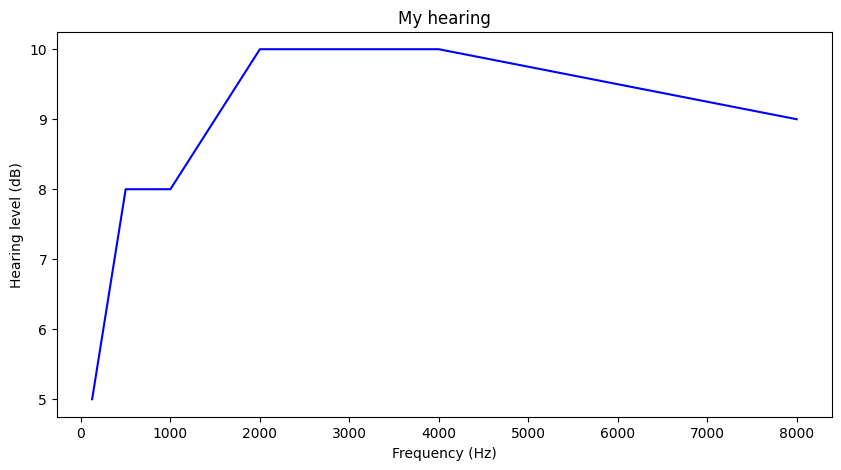

In [8]:
import matplotlib.pyplot as plt

my_hearing = {
    125: 5,
    250: 6,
    500: 8,
    1000: 8,
    2000: 10,
    4000: 10,
    8000: 9
}

plt.figure(figsize=(10,5))
plt.plot(list(my_hearing.keys()), list(my_hearing.values()))
plt.title('My hearing')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing level (dB)')
plt.show()

## The Effect of Spectrum on Timbre (Demo 28 , Tracks 53)

#### Background
Timbre can be defined as "that attribute of auditory sensation in terms of which a listener can judge that two sounds similarly presented and having the same loudness and pitch are dissimilar...". According to this definition, timbre is the subjective correlate of all those sound properties that do not directly influence pitch or loudness. These properties include the sound's spectral power distribution, its temporal envelope, rate and depth of amplitude or frequency modulation, and the degree of non-harmonicity of its partials. The timbre of a sound therefore depends on many physical variables.

The concept of timbre plays a very important role in the orchestration of traditional music and in the composition of computer music. There is, however, no satisfying comprehensive theory of timbre perception. Neither is there a uniform nomenclature to designate or classify timbre. This poses considerable problems in communicating or teaching the skills of orchestration and computer score writing to student-composers.

#### The demonstration
In the following demonstrations, one can hear the influence of spectral make-up on the perceived timbre of sounds of musical instruments.   
In this demo we show spectral slices (one per second) is a so-called waterfall spectrogram to draw attention to the added harmonics with each repetition.

##### Demonstration 28(a): Carillon bell
 
The sound of a Hermony carillon bell, having a strike-note pitch around 500 Hz (B4), is synthesized in eight steps by adding successive partials with their original frequency, phase and temporal envelope. The partials added in successive steps are:
 
- Hume note (251 Hz)
- Prime or Fundamental (501 Hz)
- Minor Third and Fifth (603, 750 Hz)
- Octave or Nominal (1005 Hz)
- Duodecime or Twelfth (1506 Hz)
- Upper Octave (2083 Hz)
- Next two partials (2421, 2721 Hz)
- Remainder of partials

##### Demonstration 28(b): Guitar
 
The sound of a guitar tone with a fundamental frequency of 251 Hz is analyzed and re-synthesized in a similar manner, the partials added in successive steps are:
 
- Fundamental
- 2nd harmonic
- 3rd harmonic
- 4th harmonic
- 5th and 6th harmonics
- 7th and 8th harmonics
- 9th, 10th and 11th harmonics
- Remainder of partials

#### Things to investigate, Questions
1. How do instruments sound when you play them over the telephone ?
    + does the pitch(note) change ?
    + can you still recognize which instrument it is ?


## Answers

1. This depends on the microphone and speaker quality and the bandwidth of the telephone line. A band pass filter is used to cut off the lower and higher parts of the spectrum. This does not change the pitch, but it does change the timbre. The timbre of the instrument is still recognizable, but it is less clear.

In [9]:
AuditoryDemo(demo="Demo28",plot_func=make_fig2,n=100)

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(layout=Layou…

## The Effect of Tone Envelope on Timbre (Demo 29, Tracks 54-56)

#### In this demo you will hear
- "A recording of a J.S. Bach chorale played on a piano"  ("Als der gütige Gott") 
- "Next the same chorale will be played backwards" 
- "Finally the tape of the last recording is played backwards so that the chorale is heard forward again, but with an interesting difference". 

#### Some Background
The purpose of this demonstration is to show that the temporal envelope of a sound, i.e. the time course of the sound's smoothed amplitude, has a significant influence on the perceived timbre of the sound.

A typical tone envelope may include an attack, a steady-state, and a decay portion (e.g. wind instrument tones), or may merely have an attack immediately followed by a decay portion (e.g. plucked or struck string tones).

By removing the attack segment of an instrument's sound, or by substituting the attack segment of another musical instrument, the perceived timbre of the sound may change so drastically that the instrument can no longer be recognised.

#### Things to investigate
- How does an instrument sound when the tape is played in reverse? 


In [10]:
AuditoryDemo(demo='Demo29')

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(layout=Layou…

## The Effect of Echoes (Demo35, Track 70)

#### In this demo you will hear
"First in an anechoic room, then in a conference room, and finally in a very reverberant space, you will hear a hammer striking a brick followed by an old Scottish
prayer. Playing these sounds backwards focuses our attention on the echoes that
occur." 

#### Some Background
This so-called "ghoulies and ghosties" demonstration (No.2 on the "Harvard tapes")
has become somewhat of a classic, and so it is reproduced here exactly as it was presented
there. The reader is Dr. Sanford Fidell.
An important property of sound in practically all enclosed space is that reflections
occur from the walls, ceiling, and floor. For a typical living space, 50 to 90 percent of
the energy is reflected at the borders. These reflections are heard as echoes if sufficient
time elapses between the initial sound and the reflected sound. Since sound travels
about a foot per millisecond, delays between the initial and secondary sound will be of
the order of 10 to 20 ms for a modest room. Practically no one reports hearing echoes
in typical small classrooms when a transient sound is initiated by a snap of the fingers.
The echoes are not heard, although the reflected sound may arrive as much as 30 to 50
ms later. This demonstration is designed to make the point that these echoes do exist
and are appreciable in size. Our hearing mechanism somehow manages to suppress the
later-arriving reflections, and they are simply not noticed.
The demonstration makes these reflections evident, however, by playing the recorded
sound backward in time. 

The transient sound is the blow of a hammer on a brick, the
more sustained sound is the narration of an old Scottish prayer. Three different acoustic
environments are used, an anechoic (echoless) room, a typical conference room, similar
acoustically to many living rooms, and finally a highly reverberant room with cement
floor, hard plaster walls and ceiling. Little reverberation is apparent in any of the
rooms when the recording is played forward, but the reversed playback makes the echoes
evident in the environment where they do occur.
Note that changes in the quality of the voice are evident as one changes rooms even
when the recording is played forward. These changes in quality are caused by differences
in amount and duration of the reflections occurring in these different environments. The
reflections are not heard as echoes, however, but as subtle, and difficult to describe,
changes in voice quality. All recordings were made with the speaker's mouth about 0.3
meters from the microphone.

#### Things to investigate
- There is reverberation in every room.  Why are we not truly aware of this (in most situations) ?
- Give an example of a situation in which we are critically aware that long reverberations hinder speech understanding.  Can you explain this ?
- Where is reverberation (long and short) most visible ? In the time domain waveform or the spectrogram ?


In [11]:
AuditoryDemo(demo='Demo35')

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(layout=Layou…

## Critical Bands by Masking

#### What you will hear
This demonstration of the masking of a single 2000-Hz tone by spectrally flat (white)
noise of different bandwidths is based on the experiments of Fletcher (1940). First, we
use broadband noise and then noise with bandwidths of 1000, 250, and 10 Hz.
In order to determine the level of the tone that can just be heard in the presence of
the noise, in each case, we present the 2000-Hz tone in 10 decreasing steps of 5 decibels
each.
Since the critical bandwidth at 2000 Hz is about 280 Hz, you would expect to hear
more steps in the 2000-Hz tone staircase when the noise bandwidth is reduced below
this value.
Since the spectrum level of the noise is kept constant, its intensity (and its subjective
loudness) will decrease markedly as the bandwidth is decreased.

- "You will hear a 2000-Hz tone in 10 decreasing steps of 5 decibels. Count bow many steps you can hear. Series are presented twice."
- "Now the signal is masked with broadband noise."
- "Next the noise has a bandwidth of 1000 Hz."
- "Next noise with a bandwidth of 250Hz is used."
- "Finally, the bandwidth is reduced to only 10 Hz."

#### Some Background
For many years, it has been known that the cochlea of the inner ear acts as a
mechanical spectrum analyzer. Fletcher's pioneering work in the 1940's pointed to t:he
existence of critical bands in the cochlear response. Studying the masking of a tone
by broadband (white) noise, Fletcher (1940) found that only a narrow band of noiise
surrounding the tone causes masking of the tone, and that when the noise just masks
the tone, the power of the noise in this band (the critical band) is equal to the powrer
in the tone.    

Critical bands are of great importance in understanding many auditory phenomema:
perception of loudness, pitch, and timbre.  Their importance is apttly
pointed out by Tobias (1970) in his Foreword to an article on Critical Bands:
"Nowhere in auditory theory or in acoustic psychophysiological practice is anything
more ubiquitous than the critical band. It turns up in the measurement of pitch,
in the study of loudness, in the analysis of masking and fatiguing signals, in the
perception of phase, and even in the determination of the pleasantness of music.   

The auditory system performs a Fourier analysis of complex sounds into their component frequencies. 
The cochlea acts as if it were made up of overlapping filters having
bandwidths equal to the critical bandwidth. The critical bandwidth varies from slightly
less than 100Hz at low frequency to about 1/3 of an octave at high frequency. 
The audible range of frequencies comprises about 24 critical bands. It should
be emphasized that there are not 24 independent filters, however. The ear's critical
bands are continuous, in that a tone of any audible frequency will find a critical band
centered on it. 

In [12]:
AuditoryDemo(demo='Demo2')

AuditoryDemo(children=(HBox(children=(Output(layout=Layout(height='60px', width='66%')), Dropdown(layout=Layou…

In [13]:
#! jupyter nbconvert Keyboard.ipynb --to html